In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("sonar_dataset.csv",header=None)
print(df.shape)
df.head()

(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [8]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [9]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [10]:
X = df.drop(60,axis=1)
y = df[60]

X.shape

(208, 60)

In [12]:
y_encoded = pd.get_dummies(y,drop_first=True)
y_encoded.head()

,R
0,True
1,True
2,True
3,True
4,True


In [14]:
y_encoded.value_counts()

R    
False    111
True      97
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.2,random_state=42)
X_train.shape

(166, 60)

In [20]:
156/32

4.875

In [21]:
import tensorflow as tf
from tensorflow import keras

In [25]:
model = keras.Sequential([
    keras.Input(shape=(60,)),
    keras.layers.Dense(60,activation="relu"),
    keras.layers.Dense(57,activation="relu"),
    keras.layers.Dense(54,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5223 - loss: 0.7006
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6665 - loss: 0.6616 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7014 - loss: 0.6346 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7198 - loss: 0.5989 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7050 - loss: 0.5484 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8442 - loss: 0.4667 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8196 - loss: 0.4222 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7145 - loss: 0.5240 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7661 - loss: 0.4483 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.3828 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - loss: 0.4228 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [26]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9315 - loss: 0.5580 


[0.5425520539283752, 0.9285714030265808]

In [27]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


In [28]:
y_pred[:5]

array([[4.4529352e-07],
       [9.9999982e-01],
       [8.7164891e-01],
       [9.9999338e-01],
       [1.5693357e-04]], dtype=float32)

In [46]:
y_pred_ind = np.round(y_pred)
y_pred_ind[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [30]:
y_test[:5]

,R
161,False
15,True
73,True
96,True
166,False


In [31]:
from sklearn.metrics import confusion_matrix,classification_report

cr = classification_report(y_test,y_pred_ind)
cm = confusion_matrix(y_test,y_pred_ind)

              precision    recall  f1-score   support

       False       0.96      0.92      0.94        26
        True       0.88      0.94      0.91        16

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



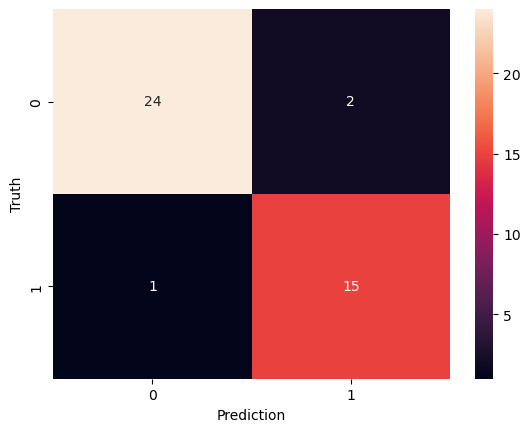

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt

print(cr)

sb.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [39]:
model_d = keras.Sequential([
    keras.Input(shape=(60,)),
    keras.layers.Dense(60,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(57,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(54,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation="sigmoid")
])
model_d.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model_d.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5564 - loss: 0.7394
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4484 - loss: 0.7344 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5361 - loss: 0.6941 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5541 - loss: 0.6794 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5393 - loss: 0.6833 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5025 - loss: 0.7023 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4922 - loss: 0.6789 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6246 - loss: 0.6566 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6568 - loss: 0.6554 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6181 - loss: 0.6598 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6366 - loss: 0.6250 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [42]:
model_d.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8790 - loss: 0.4482 


[0.4577466547489166, 0.8809523582458496]

In [50]:
y_pred_d = model_d.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


In [51]:
y_pred_d[:5]

array([[1.2106125e-05],
       [9.9989396e-01],
       [7.8397942e-01],
       [9.9402755e-01],
       [7.0559891e-04]], dtype=float32)

In [52]:
y_pred_new = np.round(y_pred_d)
y_pred_new[:5]

array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [53]:
cr_d = classification_report(y_test,y_pred_new)

In [54]:
print(cr_d)

              precision    recall  f1-score   support

       False       0.92      0.88      0.90        26
        True       0.82      0.88      0.85        16

    accuracy                           0.88        42
   macro avg       0.87      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



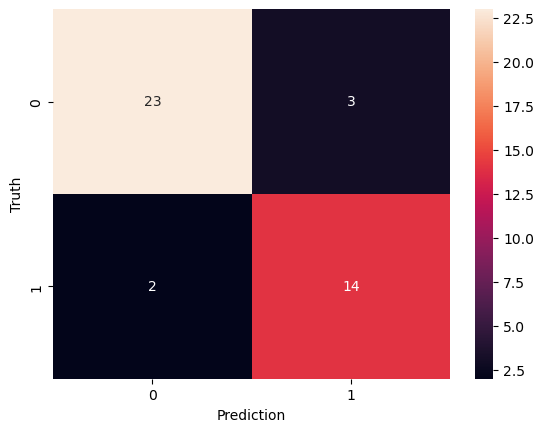

In [55]:
cm = confusion_matrix(y_test,y_pred_new)
sb.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()